In [25]:
#fixed code --> you have to run it in order otherwise it doesn't work. So when running th elines where the plots are executed

# packages
import scanpy as sc
import spapros as sp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# checking scanpy settings
sc.settings.verbosity = 0
sc.logging.print_header()
print('version:')
print(f"spapros=={sp.__version__}")
print('--------------------------------')

# DATA --> dataset 1 at timepoint 3.5 and 4.5 + dataset 2 at timepoint 3.5 and 4.5
BASE_PATH = Path("../PhD/PhD/Shankar_genes/SPAPROS_11.24") # just a set of combining the different parts of a path together basepath + time + dataset name
DATASETS = {
    "time_4": {
        "dataset_1": "endo_time_4_dataset_1.h5ad",  #dataset 1
        "dataset_wolf": "endo_time_4_dataset_wolf.h5ad" #dataset 2
    },
    "time_3": {
        "dataset_1": "endo_time_3_dataset_1.h5ad", #dataset 1
        "dataset_wolf": "endo_time_3_dataset_wolf.h5ad" #dataset 2
    }
}

####  spapros part: preprocessing data and running spapros to get a set of genes ####

# Function to load and preprocess data
def load_and_preprocess_data(filepath):
    adata = sc.read_h5ad(filepath)
    sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=2000) # selecting highly variable genes
    return adata

# Function to run Spapros selection
def run_spapros_selection(adata):
    selector = sp.se.ProbesetSelector(
        adata, 
        n=20, 
        celltype_key="seurat_clusters", 
        verbosity=1, 
        save_dir=None
    )
    selector.select_probeset()
    selection = selector.probeset.index[selector.probeset.selection]
    return pd.DataFrame(selection, columns=["Gene"]), selector

# Load all datasets
adatas = {}
for timepoint, datasets in DATASETS.items(): # loops over DATASET with dictionary in dictionary --> timepoint example: "time_4" and datasets example: "dataset_1"
    for dataset_name, filename in datasets.items():
        key = f"{timepoint}_{dataset_name}" 
        filepath = BASE_PATH / timepoint / filename # with example above this path will be ../PhD/PhD/SPAPROS_11.24/time_4/endo_time_4_dataset_1.h5ad
        adatas[key] = load_and_preprocess_data(filepath) # adata is then 

# Run Spapros selection for all datasets
spapros_results = {}
for key, adata in adatas.items():
    selection_df, selector = run_spapros_selection(adata)  # Ensure selection_df is defined here
    spapros_results[key] = (selection_df, selector) 
    spapros_results[key] = pd.DataFrame(selection_df["Gene"], columns=["Gene"])
    # or change spapros_selections to spapros_results? not sure.... if yes, the code runs. 

    # this should work 


scanpy==1.10.3 anndata==0.10.9 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.1.2 statsmodels==0.13.5 igraph==0.11.8 pynndescent==0.5.10
version:
spapros==0.1.5
--------------------------------


Output()

Note: The following celltypes' test set sizes for forest training are below min_test_n (=20):
	 1 : 13
	 2 : 6
The genes selected for those cell types potentially don't generalize well. Find the genes for each of those cell types in self.genes_of_primary_trees after running self.select_probeset().


Output()

Note: The following celltypes' test set sizes for forest training are below min_test_n (=20):
	 0 : 16
	 1 : 9
The genes selected for those cell types potentially don't generalize well. Find the genes for each of those cell types in self.genes_of_primary_trees after running self.select_probeset().


Output()

Note: The following celltypes' test set sizes for forest training are below min_test_n (=20):
	 1 : 8
The genes selected for those cell types potentially don't generalize well. Find the genes for each of those cell types in self.genes_of_primary_trees after running self.select_probeset().


Output()

Note: The following celltypes' test set sizes for forest training are below min_test_n (=20):
	 0 : 17
	 1 : 6
The genes selected for those cell types potentially don't generalize well. Find the genes for each of those cell types in self.genes_of_primary_trees after running self.select_probeset().


In [26]:
# this gives the spapros lists

for key, selection_df in spapros_results.items(): # change name to spapros_selections if it doesn't work....
    timepoint, dataset_name = key.split('_', 1)
    print(f"\nGenes selected for {timepoint} - {dataset_name}:")
    print(selection_df)

# this should work 


Genes selected for time - 4_dataset_1:
        Gene
0      LAMA1
1       CTSL
2    SLC38A2
3      GSTP1
4      CLDN6
5    GM10320
6      CENPF
7       PGA5
8      MYLPF
9        TTR
10     PLOD2
11     TDGF1
12       SMS
13   PLATR13
14     HELLS
15    FAM25C
16     APOA1
17    DNMT3L
18  FTL1.PS1
19     HMGB3

Genes selected for time - 4_dataset_wolf:
        Gene
0   Serpinh1
1     Igfbp2
2      Flrt3
3     Slc7a3
4      Lama1
5      Lamb1
6      Hspa5
7      Ckap4
8       Cubn
9       Xist
10      Tsix
11       Mt1
12      Spp1
13    Lefty2
14      Upp1
15     Khdc3
16     Rhox5
17     Timd2
18      Tpi1
19      Ier2

Genes selected for time - 3_dataset_1:
             Gene
0           SPARC
1            AQP8
2            BMP4
3            CTSL
4            SPIC
5           TDGF1
6        SERPINH1
7         TMEM41B
8           HSPA5
9           KHDC3
10  G430049J08RIK
11           BHMT
12         FAM25C
13        MT.ATP6
14         GOLGA3
15          FABP5
16          H2AFX
17     

In [27]:
# known genes from shifaan, typical for certain cell types
known_genes_df = pd.read_excel('../PhD/PhD/Shankar_genes/Genes_25_11/known_tissue_marker_gene_lists.xlsx')


In [28]:
known_genes_df

,Cell Types,TE,ICM,pTE,mTE,EPI,PrE,ParE,VE,ExE,emVE,exVE,AVE
0,NaN,Cdx2,Sox2,Cdx2,Hand1,Oct4,PdgfrA,Gata6,FoxA2,Cdx2,Sfrp5,Aplp1,Cer1
1,NaN,Gata3,Nanog,Ovol1,Ascl2,Nanog,Sox17,Sox17,Ttr,Hand1,Gpc4,Egr1,Lefty1
2,NaN,Gata2,Oct4,Gata3,Plac1,Fgf4,Gata4,Lama1,Lhx1,Gata3,Afp,Fabp3,Hhex
3,NaN,Eomes,Sall4,Eomes,Phlda2,Tdgf1,Fgfr2,Sall4,Afp,Elf5,Foxq1,Apln,Efna5
4,NaN,Tfap2c,Klf4,Muc15,Prl3d1,Slc7a3,Gata6,Myc,Cited1,Cldn4,Lhx1,Apa2,Krt19
5,NaN,Elf5,Stat3,Dlx5,NaN,Sox11,Sox7,Lamb1,Hnf1b,S100a6,Fgf5,Msx1,Gsc
6,NaN,Id2,NaN,Ccr7,NaN,Esrrb,Grb2,Sparc,Dab2,NaN,Shisa2,S100a13,Ak31c13
7,NaN,Tead4,NaN,Fgfr2,NaN,Terf1,Hnf4a,NaN,Ihh,NaN,Basp1,B3galnt1,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,Lrp2,NaN,NaN,NaN,Col23a1,NaN,NaN


In [47]:
# creating a list with the genes from Shifaan 
unique_genes = known_genes_df.melt(value_vars=known_genes_df.columns[1:])['value'].dropna().unique()


In [48]:
unique_genes

array(['Cdx2', 'Gata3', 'Gata2', 'Eomes', 'Tfap2c', 'Elf5', 'Id2',
       'Tead4', 'Sox2', 'Nanog', 'Oct4', 'Sall4', 'Klf4', 'Stat3',
       'Ovol1', 'Muc15', 'Dlx5', 'Ccr7', 'Fgfr2', 'Hand1', 'Ascl2',
       'Plac1', 'Phlda2', 'Prl3d1', 'Fgf4', 'Tdgf1', 'Slc7a3', 'Sox11',
       'Esrrb', 'Terf1', 'PdgfrA', 'Sox17', 'Gata4', 'Gata6', 'Sox7',
       'Grb2', 'Hnf4a', 'Lrp2', 'Lama1', 'Myc', 'Lamb1', 'Sparc', 'FoxA2',
       'Ttr', 'Lhx1', 'Afp', 'Cited1', 'Hnf1b', 'Dab2', 'Ihh', 'Cldn4',
       'S100a6', 'Sfrp5', 'Gpc4', 'Foxq1', 'Fgf5', 'Shisa2', 'Basp1',
       'Col23a1', 'Aplp1', 'Egr1', 'Fabp3', 'Apln', 'Apa2', 'Msx1',
       'S100a13', 'B3galnt1', 'Cer1', 'Lefty1', 'Hhex', 'Efna5', 'Krt19',
       'Gsc', 'Ak31c13'], dtype=object)

In [49]:
# create dataframe 
data = {
    'TE': ['Cdx2', 'Gata3', 'Gata2', 'Eomes', 'Tfap2c', 'Elf5', 'Id2', 'Tead4', None],
    'ICM': ['Sox2', 'Nanog', 'Oct4', 'Sall4', 'Klf4', 'Stat3', None, None, None],
    'pTE': ['Cdx2', 'Ovol1', 'Gata3', 'Eomes', 'Muc15', 'Dlx5', 'Ccr7', 'Fgfr2', None],
    'mTE': ['Hand1', 'Ascl2', 'Plac1', 'Phlda2', 'Prl3d1', None, None, None, None],
    'EPI': ['Oct4', 'Nanog', 'Fgf4', 'Tdgf1', 'Slc7a3', 'Sox11', 'Esrrb', 'Terf1', None],
    'PrE': ['PdgfrA', 'Sox17', 'Gata4', 'Fgfr2', 'Gata6', 'Sox7', 'Grb2', 'Hnf4a', 'Lrp2'],
    'ParE': ['Gata6', 'Sox17', 'Lama1', 'Sall4', 'Myc', 'Lamb1', 'Sparc', None, None],
    'VE': ['FoxA2', 'Ttr', 'Lhx1', 'Afp', 'Cited1', 'Hnf1b', 'Dab2', 'Ihh', None],
    'ExE': ['Cdx2', 'Hand1', 'Gata3', 'Elf5', 'Lhx1', 'S100a6', None, None, None],
    'emVE': ['Sfrp5', 'Gpc4', 'Afp', 'Foxq1', 'Apa2', 'Fgf5', 'Shisa2', 'Basp1', 'Col23a1'],
    'exVE': ['Aplp1', 'Egr1', 'Fabp3', 'Apln', 'Krt19', 'Msx1', 'S100a13', None, None],
    'AVE': ['Cer1', 'Lefty1', 'Hhex', 'Efna5', None, 'Gsc', 'Ak31c13', None, None]
}

genes_df = pd.DataFrame(data)

# Capitalize gene names and append column names
for column in genes_df.columns:
    genes_df[column] = genes_df[column].apply(lambda x: f"{x.upper()}_{column}" if pd.notna(x) else x)

# Print the updated DataFrame to verify the changes
print(genes_df)

          TE        ICM        pTE         mTE         EPI         PrE  \
0    CDX2_TE   SOX2_ICM   CDX2_pTE   HAND1_mTE    OCT4_EPI  PDGFRA_PrE   
1   GATA3_TE  NANOG_ICM  OVOL1_pTE   ASCL2_mTE   NANOG_EPI   SOX17_PrE   
2   GATA2_TE   OCT4_ICM  GATA3_pTE   PLAC1_mTE    FGF4_EPI   GATA4_PrE   
3   EOMES_TE  SALL4_ICM  EOMES_pTE  PHLDA2_mTE   TDGF1_EPI   FGFR2_PrE   
4  TFAP2C_TE   KLF4_ICM  MUC15_pTE  PRL3D1_mTE  SLC7A3_EPI   GATA6_PrE   
5    ELF5_TE  STAT3_ICM   DLX5_pTE        None   SOX11_EPI    SOX7_PrE   
6     ID2_TE       None   CCR7_pTE        None   ESRRB_EPI    GRB2_PrE   
7   TEAD4_TE       None  FGFR2_pTE        None   TERF1_EPI   HNF4A_PrE   
8       None       None       None        None        None    LRP2_PrE   

         ParE         VE         ExE          emVE          exVE          AVE  
0  GATA6_ParE   FOXA2_VE    CDX2_ExE    SFRP5_emVE    APLP1_exVE     CER1_AVE  
1  SOX17_ParE     TTR_VE   HAND1_ExE     GPC4_emVE     EGR1_exVE   LEFTY1_AVE  
2  LAMA1_ParE    LH

In [65]:
import os
import scanpy as sc
import spapros as sp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# creating paths to the files from the 4 different datasets

filepath_3_1 = '../PhD/PhD/Shankar_genes/SPAPROS_11.24/time_3/endo_time_3_dataset_1.h5ad'
filepath_3_2 = '../PhD/PhD/Shankar_genes/SPAPROS_11.24/time_3/endo_time_3_dataset_wolf.h5ad'
filepath_4_1 = '../PhD/PhD/Shankar_genes/SPAPROS_11.24/time_4/endo_time_4_dataset_1.h5ad'
filepath_4_2 = '../PhD/PhD/Shankar_genes/SPAPROS_11.24/time_4/endo_time_4_dataset_wolf.h5ad'

# read datasets
adata_3_1 = sc.read_h5ad(filepath_3_1)
adata_3_2 = sc.read_h5ad(filepath_3_2)
adata_4_1 = sc.read_h5ad(filepath_4_1)
adata_4_2 = sc.read_h5ad(filepath_4_2)


# read the top ten genes lists

top_d1_t3 = pd.read_csv('../PhD/PhD/List_of_genes_final/top_ten_genes/dataset1_tp3_top10_high.csv')
top_d1_t4 = pd.read_csv('../PhD/PhD/List_of_genes_final/top_ten_genes/dataset1_tp4_top10_high.csv')
top_d2_t3 = pd.read_csv('../PhD/PhD/List_of_genes_final/top_ten_genes/dataset2_tp3_top10_nohigh.csv')
top_d2_t4 = pd.read_csv('../PhD/PhD/List_of_genes_final/top_ten_genes/dataset2_tp4_top10_high.csv')

# create a list

topgenes_d1_3 = top_d1_t3['Gene'].values.tolist()
topgenes_d1_4 = top_d1_t4['Gene'].values.tolist()
topgenes_d2_3 = top_d2_t3['Gene'].values.tolist()
topgenes_d2_4 = top_d2_t4['Gene'].values.tolist()


# dictionary with datasets and the top genes belonging to each dataset
topgenes_dict = {
    "Dataset 1 (Time 3)": topgenes_d1_3,
    "Dataset 1 (Time 4)": topgenes_d1_4,
    "Dataset 2 (Time 3)": topgenes_d2_3,
    "Dataset 2 (Time 4)": topgenes_d2_4
}

# datasets
datasets = [adata_3_1, adata_3_2, adata_4_1, adata_4_2]
dataset_names = ["Dataset 1 (Time 3)", "Dataset 2 (Time 3)", "Dataset 1 (Time 4)", "Dataset 2 (Time 4)"]

# not all genes are capitalized, which causes issues --> all genes from all datasets/lists need to be capitalized
adata_3_2.var_names = [gene.upper() for gene in adata_3_2.var_names]
adata_4_2.var_names = [gene.upper() for gene in adata_4_2.var_names]

In [66]:
adata_3_2.var_names

Index(['PCMTD1', 'GM9826', 'CDH7', 'EXO1', 'UXS1', 'CDH19', 'DSEL', 'PLD5',
       'RBM8A2', 'ASIC4',
       ...
       'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4',
       'MT-ND5', 'MT-ND6', 'MT-CYTB'],
      dtype='object', length=24779)

Valid genes in Dataset 1 (Time 3): ['CDX2', 'GATA3', 'GATA2', 'EOMES', 'TFAP2C', 'ELF5', 'ID2', 'TEAD4', 'SOX2', 'NANOG', 'SALL4', 'KLF4', 'STAT3', 'OVOL1', 'FGFR2', 'HAND1', 'ASCL2', 'PLAC1', 'PHLDA2', 'FGF4', 'TDGF1', 'SLC7A3', 'SOX11', 'ESRRB', 'TERF1', 'PDGFRA', 'SOX17', 'GATA4', 'GATA6', 'SOX7', 'GRB2', 'HNF4A', 'LRP2', 'LAMA1', 'MYC', 'LAMB1', 'SPARC', 'FOXA2', 'TTR', 'LHX1', 'AFP', 'CITED1', 'HNF1B', 'DAB2', 'IHH', 'CLDN4', 'S100A6', 'SFRP5', 'GPC4', 'FOXQ1', 'FGF5', 'SHISA2', 'BASP1', 'COL23A1', 'APLP1', 'EGR1', 'FABP3', 'APLN', 'MSX1', 'S100A13', 'B3GALNT1', 'LEFTY1', 'HHEX', 'EFNA5', 'KRT19', 'GSC']


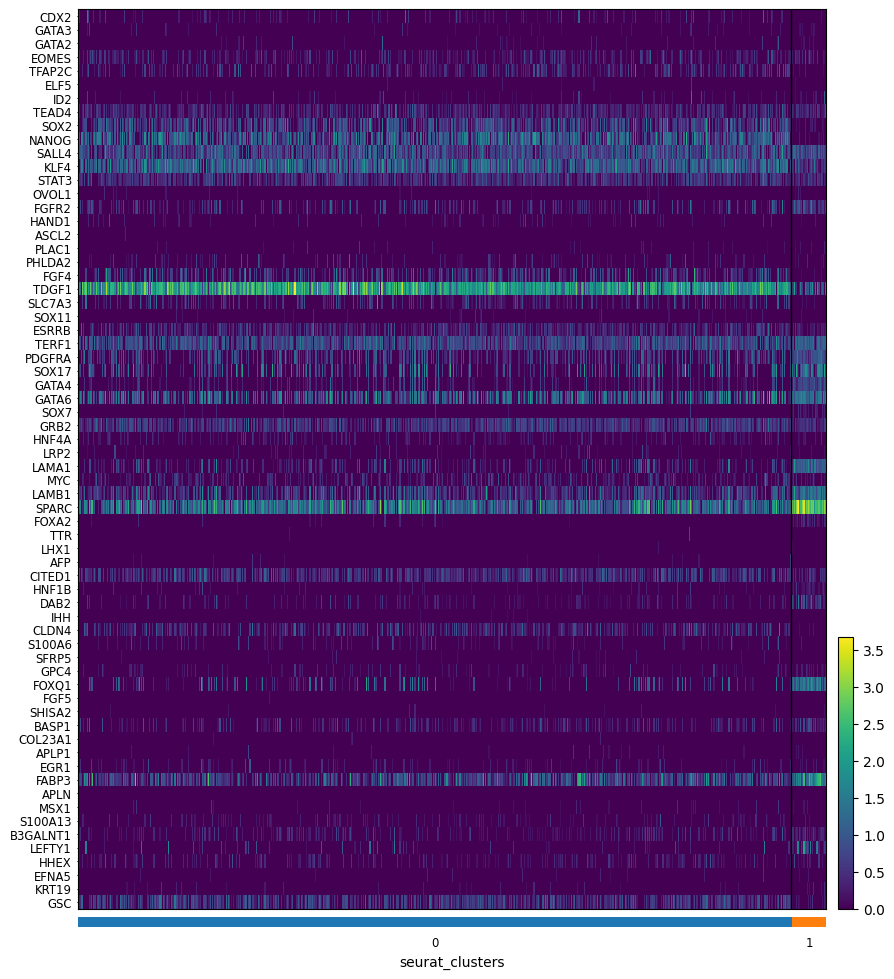

Valid genes in Dataset 2 (Time 3): ['CDX2', 'GATA3', 'GATA2', 'EOMES', 'TFAP2C', 'ELF5', 'ID2', 'TEAD4', 'SOX2', 'NANOG', 'SALL4', 'KLF4', 'STAT3', 'OVOL1', 'MUC15', 'DLX5', 'CCR7', 'FGFR2', 'HAND1', 'ASCL2', 'PLAC1', 'PHLDA2', 'PRL3D1', 'FGF4', 'SLC7A3', 'SOX11', 'ESRRB', 'TERF1', 'PDGFRA', 'SOX17', 'GATA4', 'GATA6', 'SOX7', 'GRB2', 'HNF4A', 'LRP2', 'LAMA1', 'MYC', 'LAMB1', 'SPARC', 'FOXA2', 'TTR', 'LHX1', 'AFP', 'CITED1', 'HNF1B', 'DAB2', 'IHH', 'CLDN4', 'S100A6', 'SFRP5', 'GPC4', 'FOXQ1', 'FGF5', 'SHISA2', 'BASP1', 'COL23A1', 'APLP1', 'EGR1', 'FABP3', 'APLN', 'MSX1', 'S100A13', 'B3GALNT1', 'CER1', 'LEFTY1', 'HHEX', 'EFNA5', 'KRT19', 'GSC']


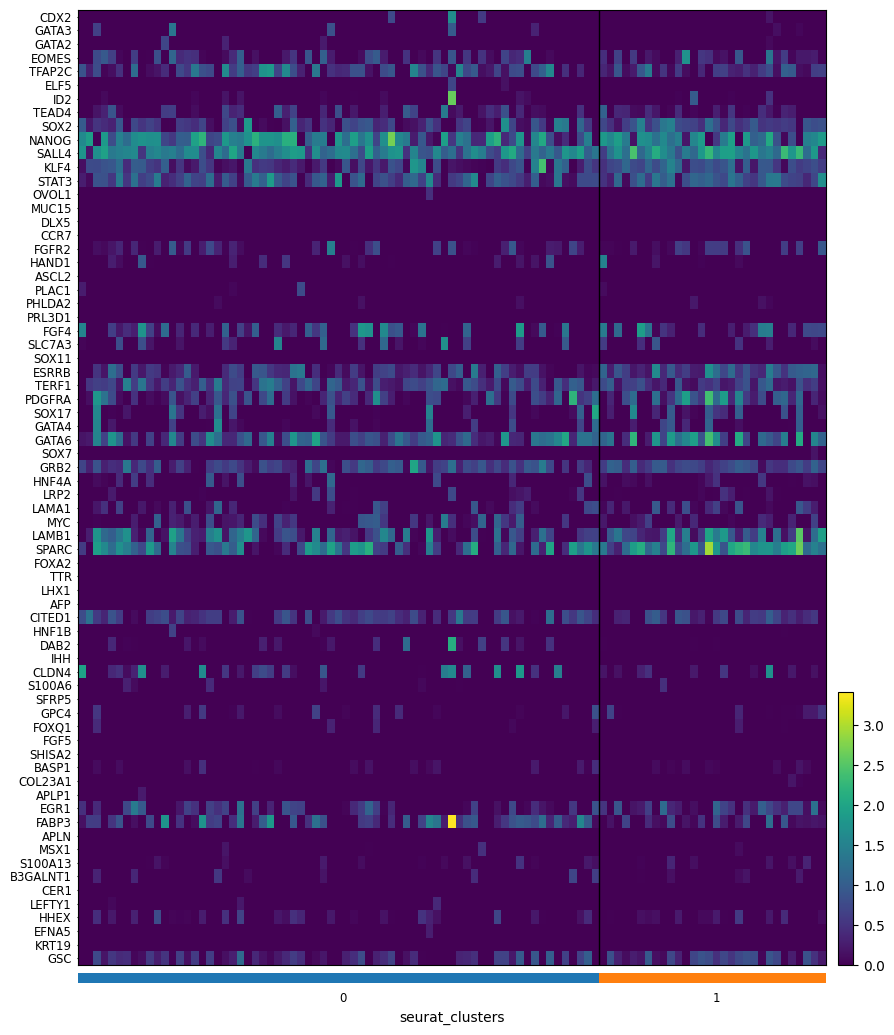

Valid genes in Dataset 1 (Time 4): ['CDX2', 'GATA3', 'GATA2', 'EOMES', 'TFAP2C', 'ELF5', 'ID2', 'TEAD4', 'SOX2', 'NANOG', 'SALL4', 'KLF4', 'STAT3', 'OVOL1', 'FGFR2', 'HAND1', 'ASCL2', 'PLAC1', 'PHLDA2', 'FGF4', 'TDGF1', 'SLC7A3', 'SOX11', 'ESRRB', 'TERF1', 'PDGFRA', 'SOX17', 'GATA4', 'GATA6', 'SOX7', 'GRB2', 'HNF4A', 'LRP2', 'LAMA1', 'MYC', 'LAMB1', 'SPARC', 'FOXA2', 'TTR', 'LHX1', 'AFP', 'CITED1', 'HNF1B', 'DAB2', 'IHH', 'CLDN4', 'S100A6', 'SFRP5', 'GPC4', 'FOXQ1', 'FGF5', 'SHISA2', 'BASP1', 'COL23A1', 'APLP1', 'EGR1', 'FABP3', 'APLN', 'MSX1', 'S100A13', 'B3GALNT1', 'LEFTY1', 'HHEX', 'EFNA5', 'KRT19', 'GSC']


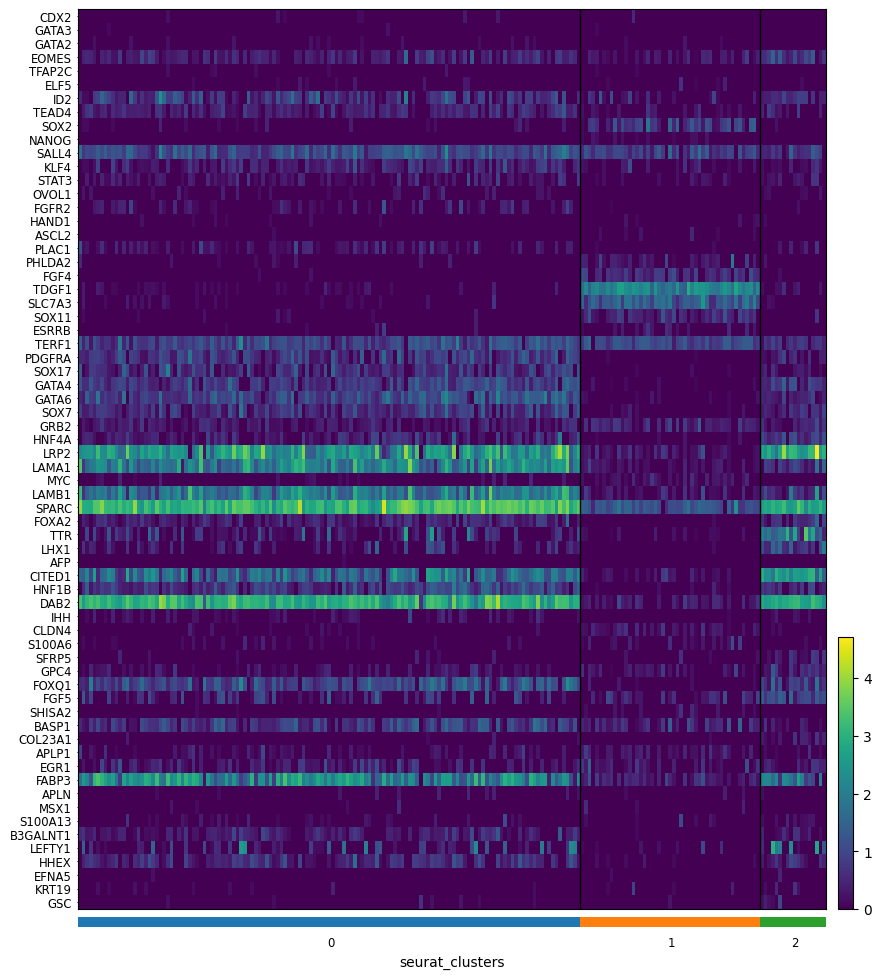

Valid genes in Dataset 2 (Time 4): ['CDX2', 'GATA3', 'GATA2', 'EOMES', 'TFAP2C', 'ELF5', 'ID2', 'TEAD4', 'SOX2', 'NANOG', 'SALL4', 'KLF4', 'STAT3', 'OVOL1', 'MUC15', 'DLX5', 'CCR7', 'FGFR2', 'HAND1', 'ASCL2', 'PLAC1', 'PHLDA2', 'PRL3D1', 'FGF4', 'SLC7A3', 'SOX11', 'ESRRB', 'TERF1', 'PDGFRA', 'SOX17', 'GATA4', 'GATA6', 'SOX7', 'GRB2', 'HNF4A', 'LRP2', 'LAMA1', 'MYC', 'LAMB1', 'SPARC', 'FOXA2', 'TTR', 'LHX1', 'AFP', 'CITED1', 'HNF1B', 'DAB2', 'IHH', 'CLDN4', 'S100A6', 'SFRP5', 'GPC4', 'FOXQ1', 'FGF5', 'SHISA2', 'BASP1', 'COL23A1', 'APLP1', 'EGR1', 'FABP3', 'APLN', 'MSX1', 'S100A13', 'B3GALNT1', 'CER1', 'LEFTY1', 'HHEX', 'EFNA5', 'KRT19', 'GSC']


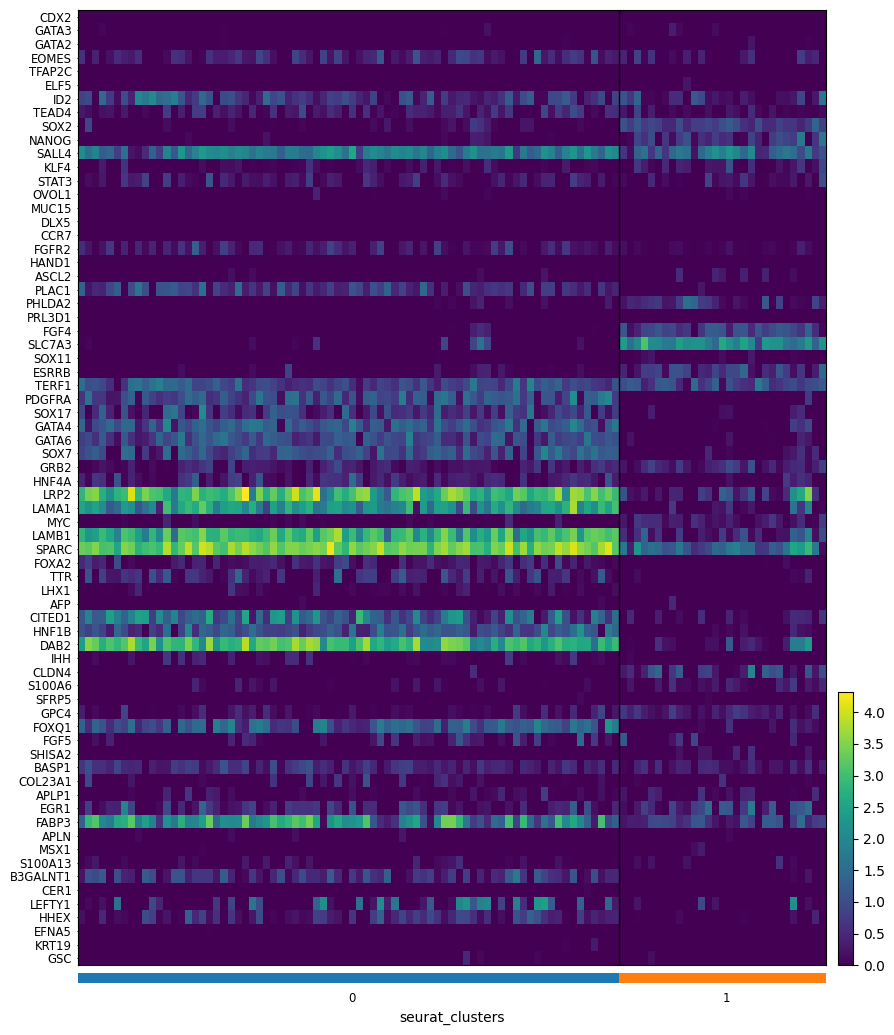

Creating UMAP for ATXN2L in Dataset Wolf (Time 3):


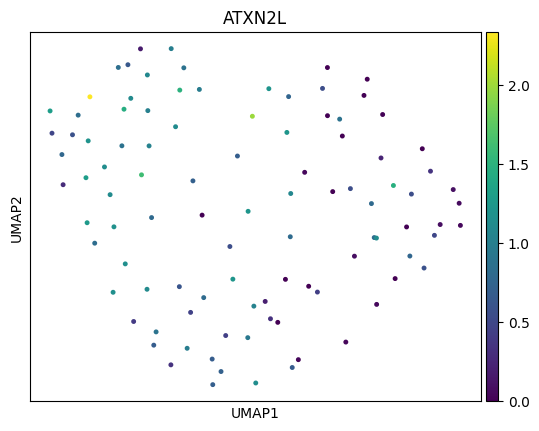

Creating UMAP for CCND3 in Dataset Wolf (Time 3):


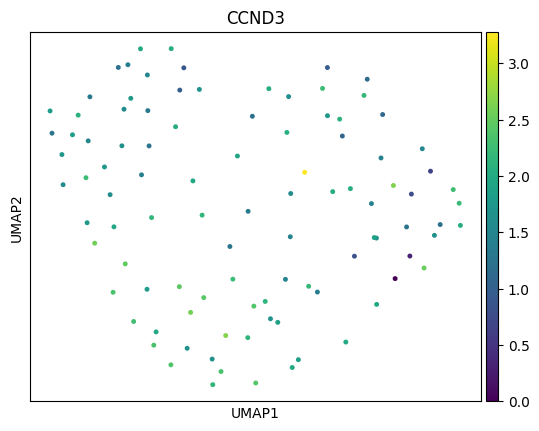

Creating UMAP for CALM2 in Dataset Wolf (Time 3):


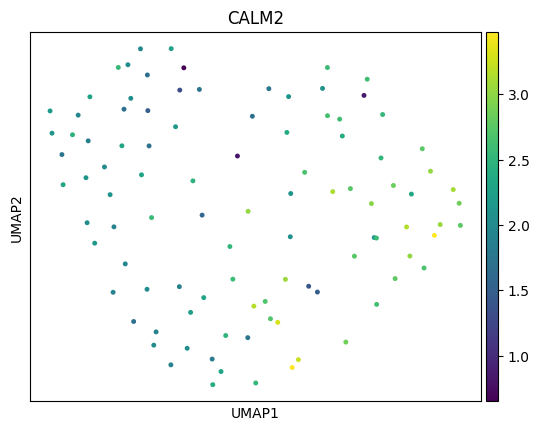

Creating UMAP for CDK1 in Dataset Wolf (Time 3):


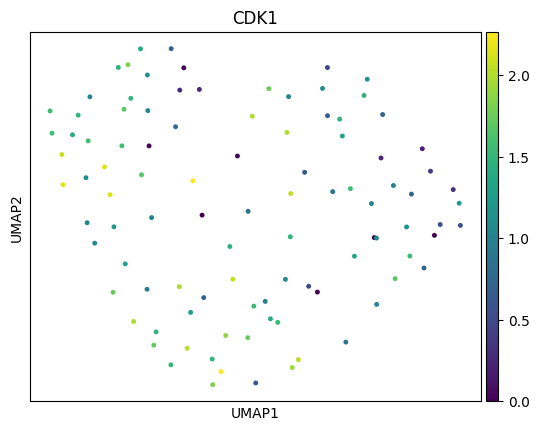

dataset_name: Dataset 1 (Time 3)
--------
adata: AnnData object with n_obs × n_vars = 698 × 13762
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'integrated_snn_res.0.1', 'seurat_clusters'
    var: 'name'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
Creating UMAPs for Dataset 1 (Time 3) with 10 top genes.
Creating UMAP for AKR1C13 in Dataset 1 (Time 3):


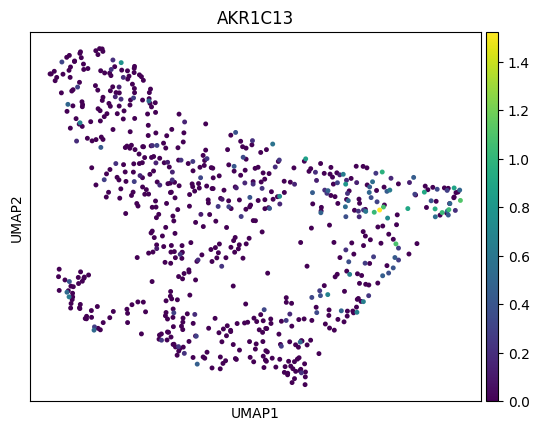

Creating UMAP for AQP8 in Dataset 1 (Time 3):


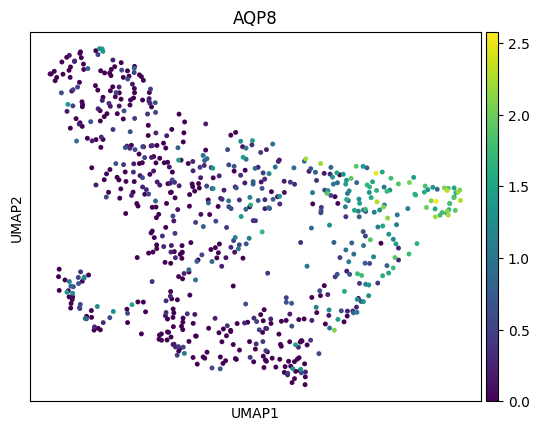

Creating UMAP for BHMT in Dataset 1 (Time 3):


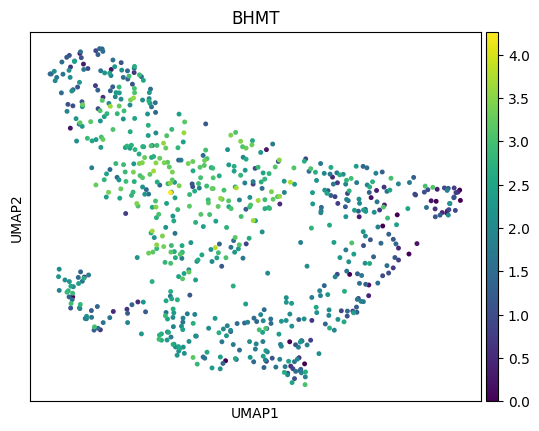

Creating UMAP for BMP4 in Dataset 1 (Time 3):


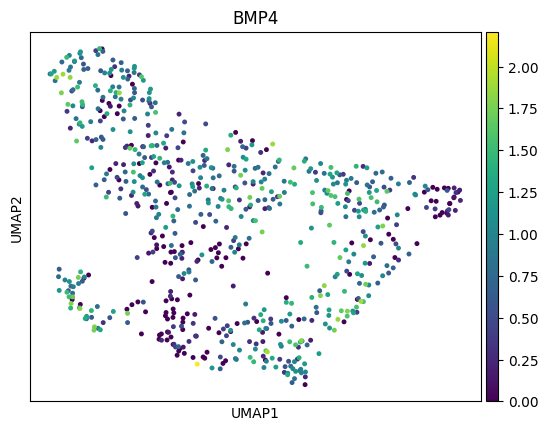

Creating UMAP for COL4A2 in Dataset 1 (Time 3):


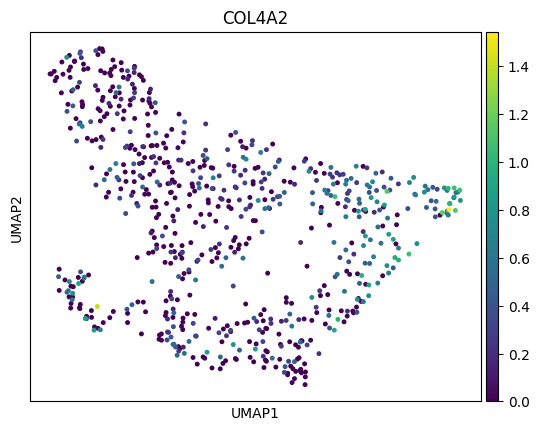

Creating UMAP for CTSL in Dataset 1 (Time 3):


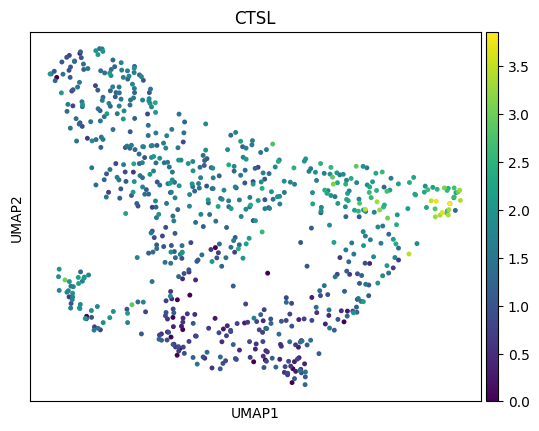

Creating UMAP for DUSP9 in Dataset 1 (Time 3):


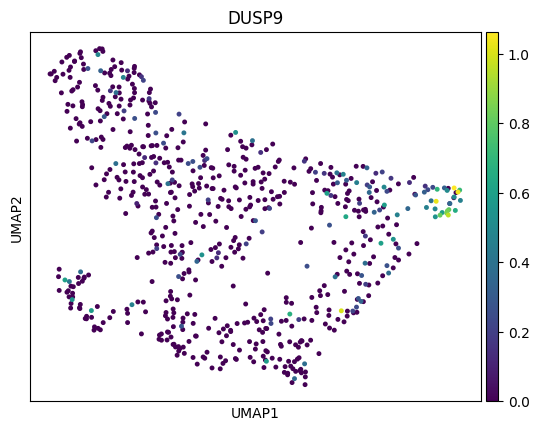

Creating UMAP for ENO4 in Dataset 1 (Time 3):


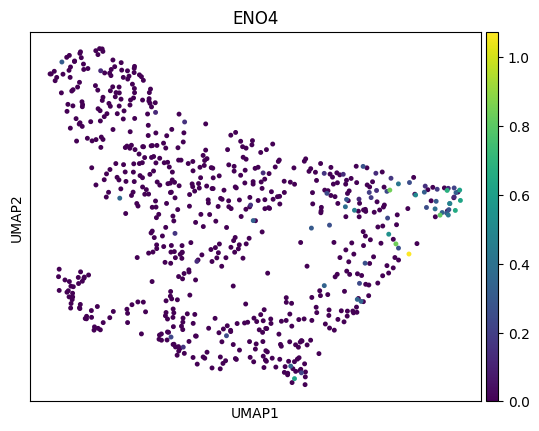

Creating UMAP for EPHA2 in Dataset 1 (Time 3):


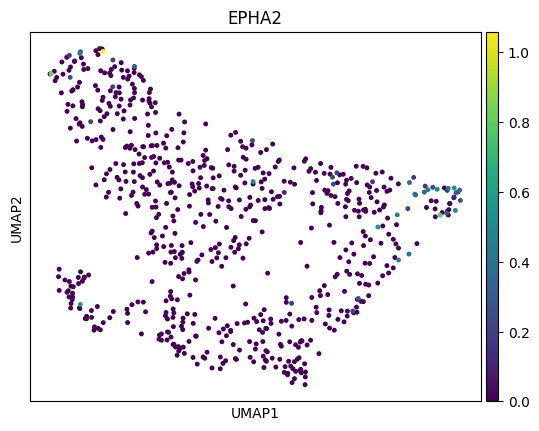

Creating UMAP for FAM25C in Dataset 1 (Time 3):


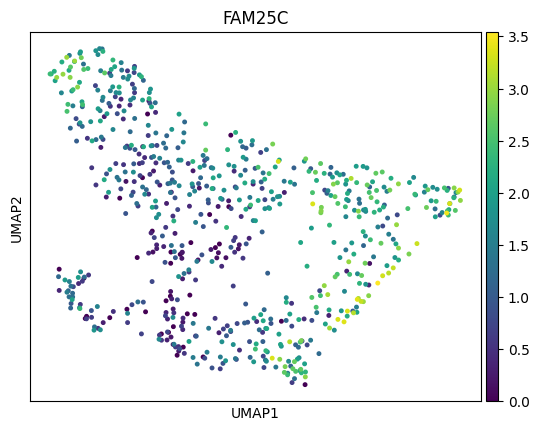

dataset_name: Dataset Wolf (Time 3)
--------
adata: AnnData object with n_obs × n_vars = 99 × 24779
    obs: 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.1', 'seurat_clusters'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'
Creating UMAPs for Dataset Wolf (Time 3) with 10 top genes.
Creating UMAP for BHMT in Dataset Wolf (Time 3):


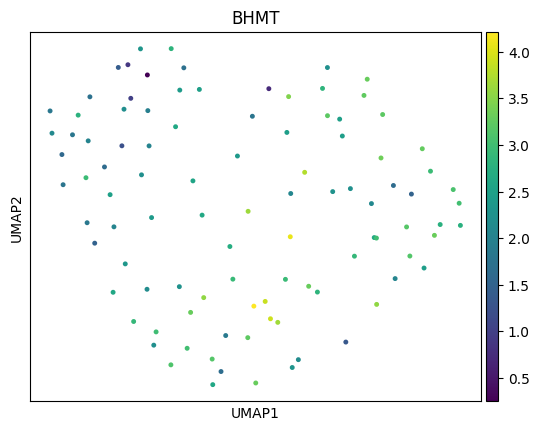

Creating UMAP for GM20431 in Dataset Wolf (Time 3):


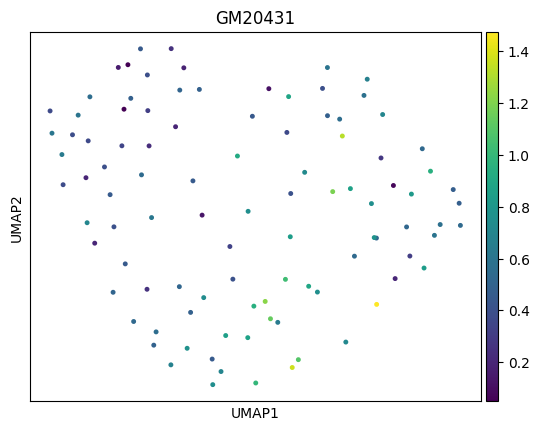

Creating UMAP for HSP90AA1 in Dataset Wolf (Time 3):


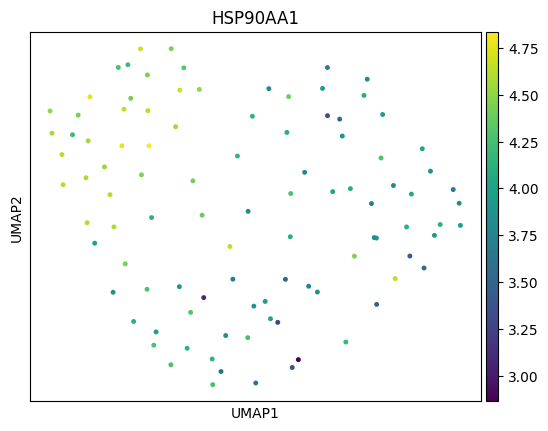

Creating UMAP for ODC1 in Dataset Wolf (Time 3):


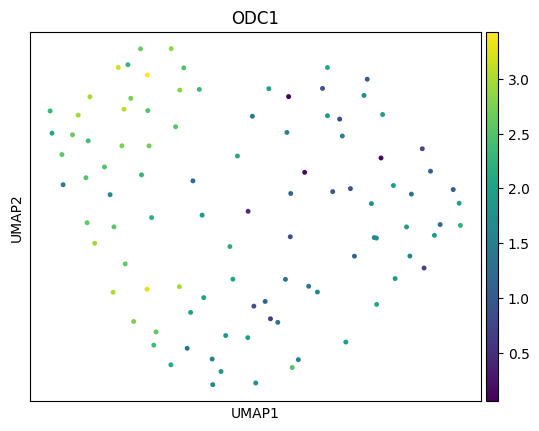

Creating UMAP for PRAMEL33 in Dataset Wolf (Time 3):


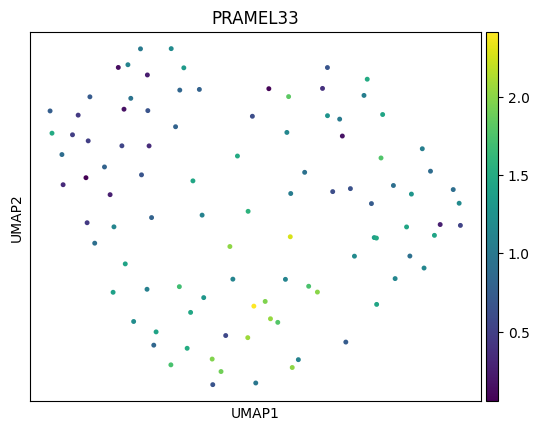

Creating UMAP for RPS15A in Dataset Wolf (Time 3):


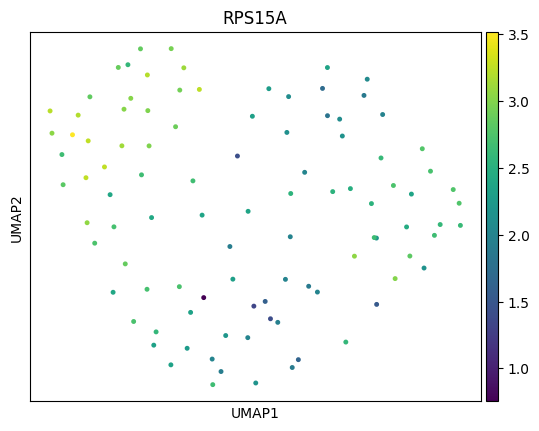

Creating UMAP for 1110018N20RIK in Dataset Wolf (Time 3):


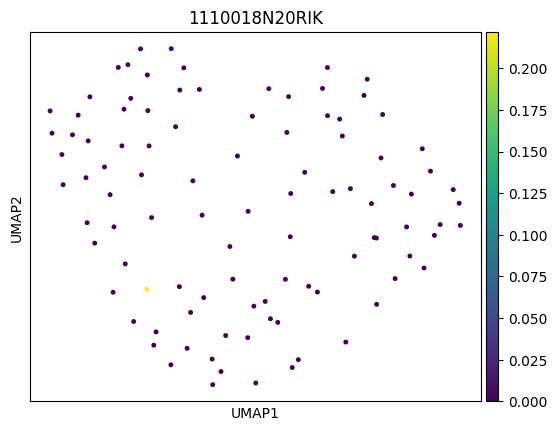

Creating UMAP for 1700003M07RIK in Dataset Wolf (Time 3):


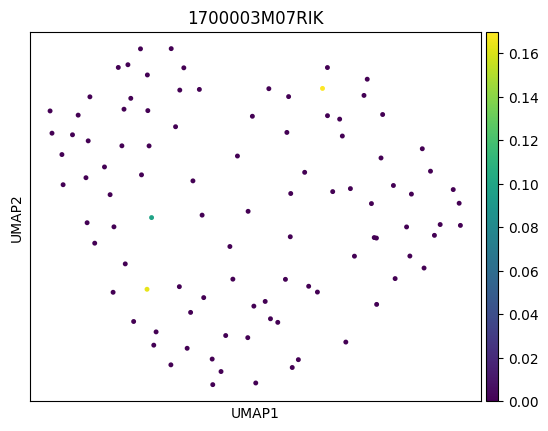

Creating UMAP for 1700095A21RIK in Dataset Wolf (Time 3):


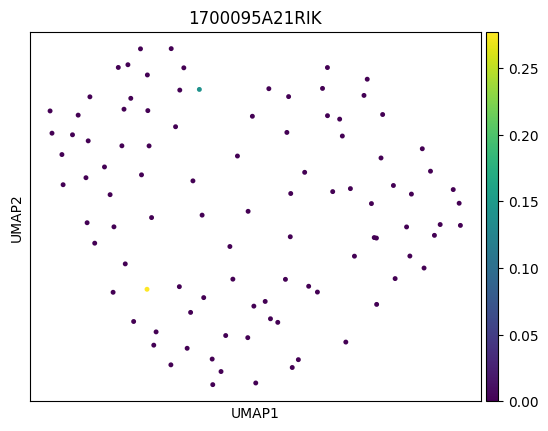

Creating UMAP for 1700110K17RIK in Dataset Wolf (Time 3):


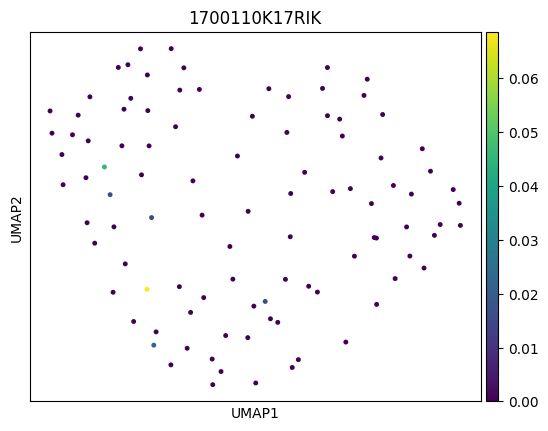

dataset_name: Dataset 1 (Time 4)
--------
adata: AnnData object with n_obs × n_vars = 204 × 13762
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'integrated_snn_res.0.1', 'seurat_clusters'
    var: 'name'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
Creating UMAPs for Dataset 1 (Time 4) with 10 top genes.
Creating UMAP for APOA1 in Dataset 1 (Time 4):


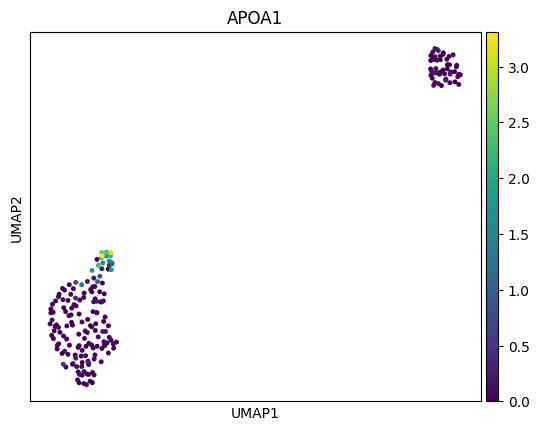

Creating UMAP for DGKK in Dataset 1 (Time 4):


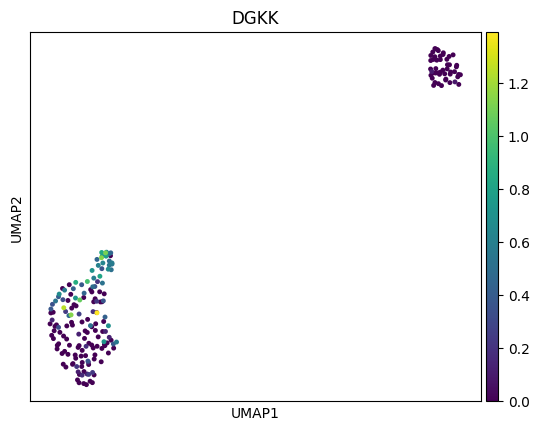

Creating UMAP for FGF8 in Dataset 1 (Time 4):


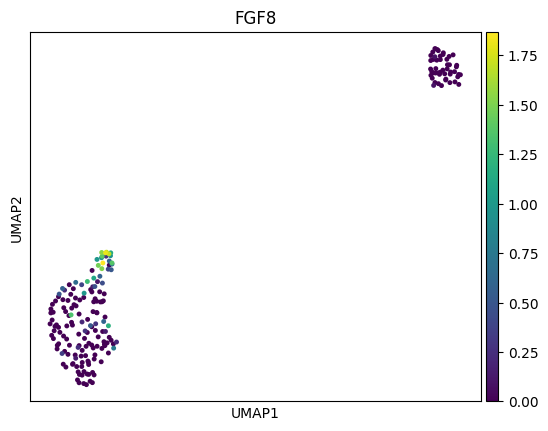

Creating UMAP for HMGB3 in Dataset 1 (Time 4):


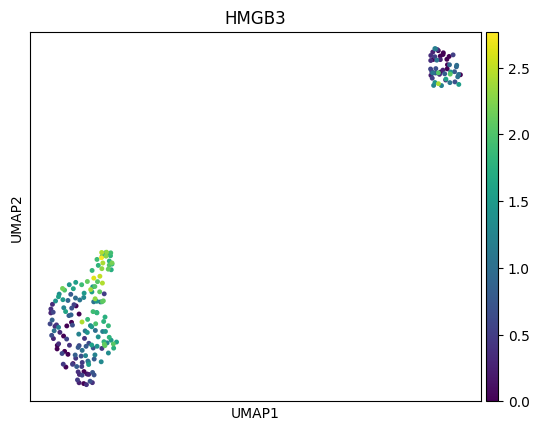

Creating UMAP for LHX1 in Dataset 1 (Time 4):


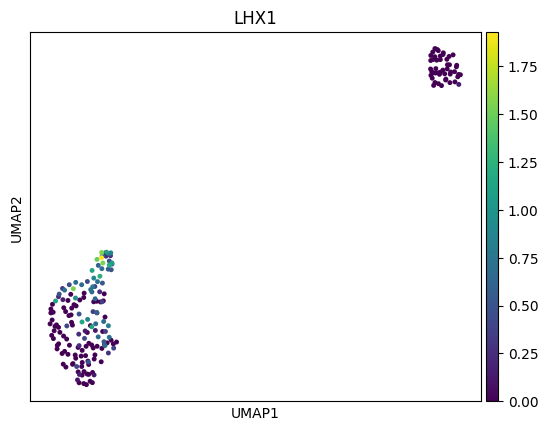

Creating UMAP for PGA5 in Dataset 1 (Time 4):


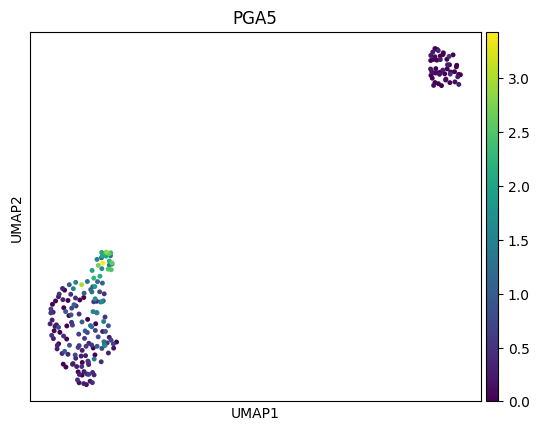

Creating UMAP for ACP6 in Dataset 1 (Time 4):


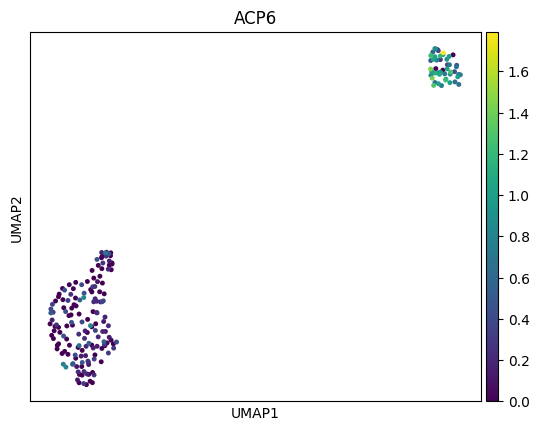

Creating UMAP for ADPRH in Dataset 1 (Time 4):


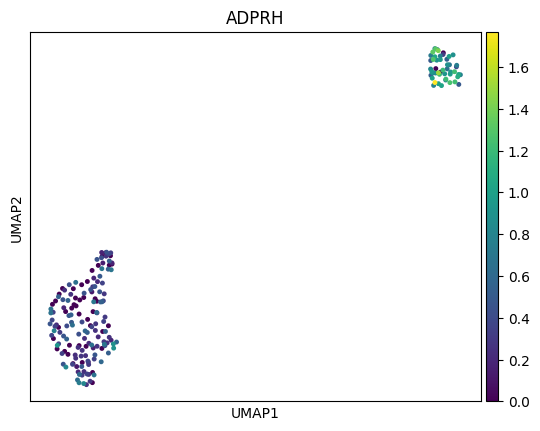

Creating UMAP for AIRE in Dataset 1 (Time 4):


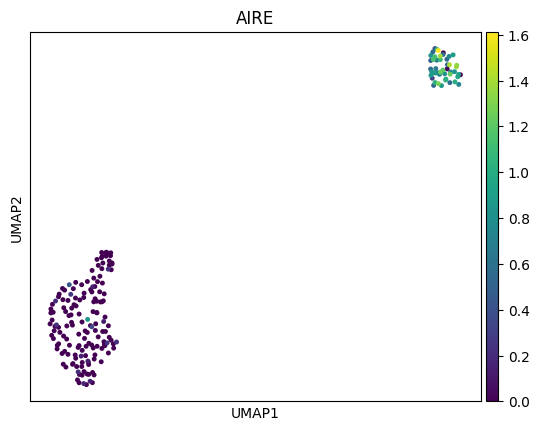

Creating UMAP for ALDH2 in Dataset 1 (Time 4):


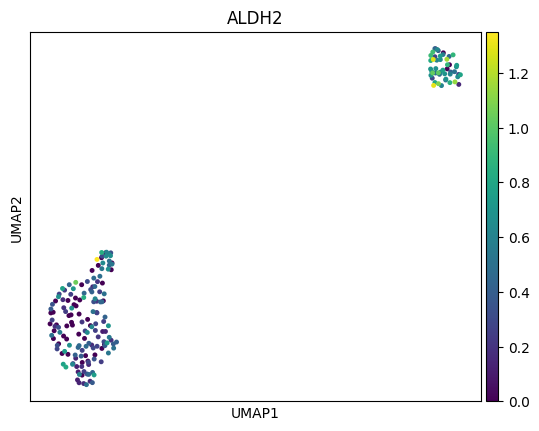

dataset_name: Dataset Wolf (Time 4)
--------
adata: AnnData object with n_obs × n_vars = 105 × 24779
    obs: 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.1', 'seurat_clusters', 'original_cluster'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'
Creating UMAPs for Dataset Wolf (Time 4) with 10 top genes.
Creating UMAP for SLC7A3 in Dataset Wolf (Time 4):


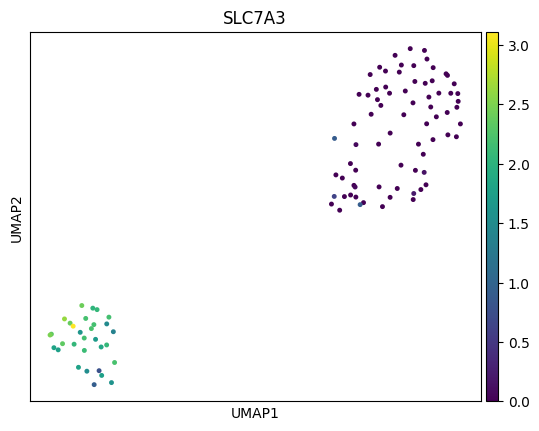

Creating UMAP for 1190005I06RIK in Dataset Wolf (Time 4):


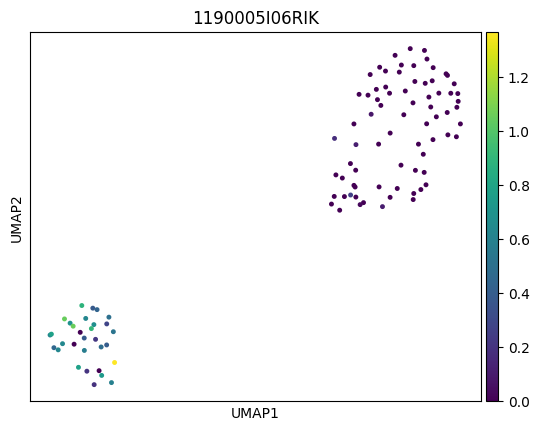

Creating UMAP for AMOT in Dataset Wolf (Time 4):


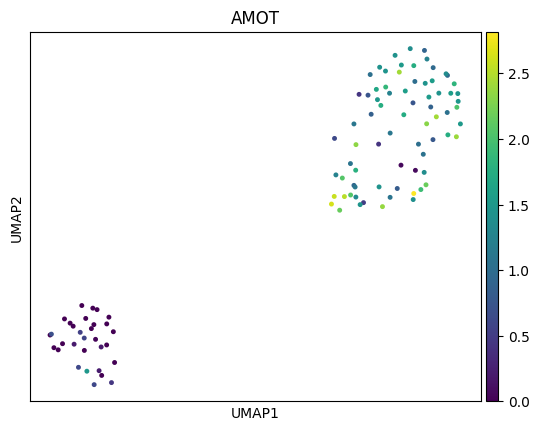

Creating UMAP for ANGPTL4 in Dataset Wolf (Time 4):


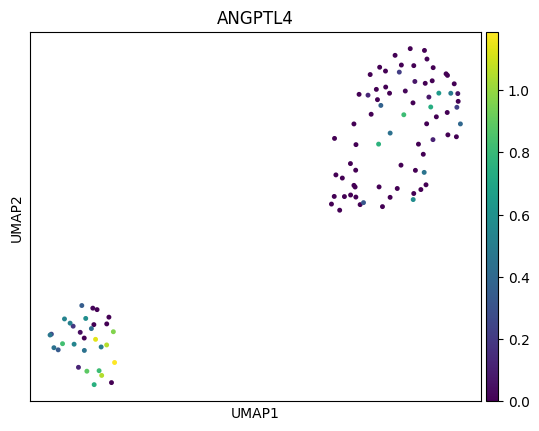

Creating UMAP for ANP32A in Dataset Wolf (Time 4):


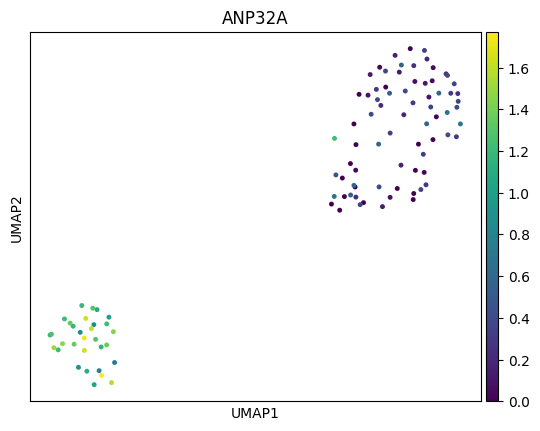

Creating UMAP for ARHGAP4 in Dataset Wolf (Time 4):


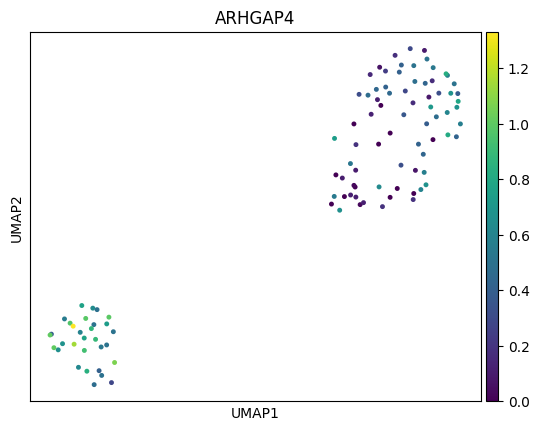

Creating UMAP for CKAP4 in Dataset Wolf (Time 4):


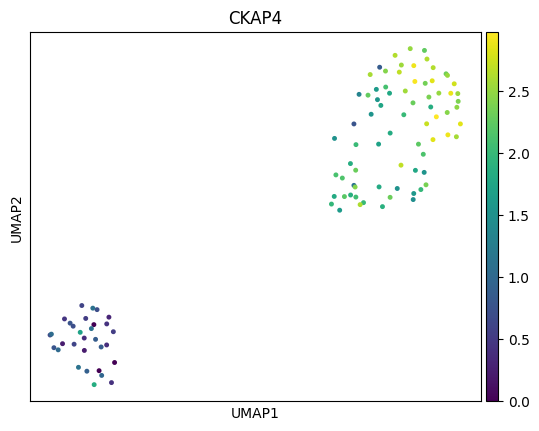

Creating UMAP for CRELD2 in Dataset Wolf (Time 4):


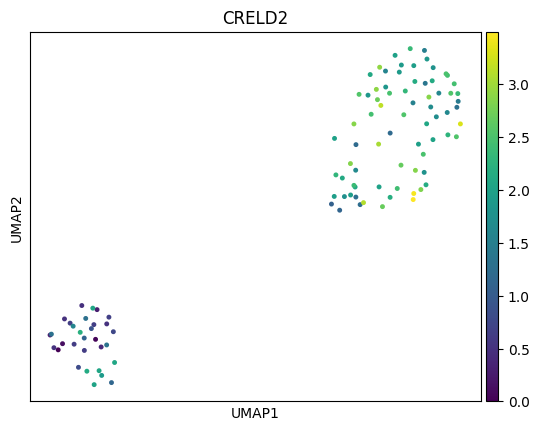

Creating UMAP for CTSH in Dataset Wolf (Time 4):


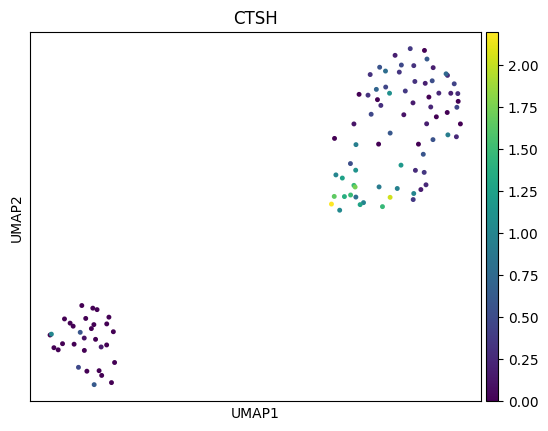

Creating UMAP for CUBN in Dataset Wolf (Time 4):


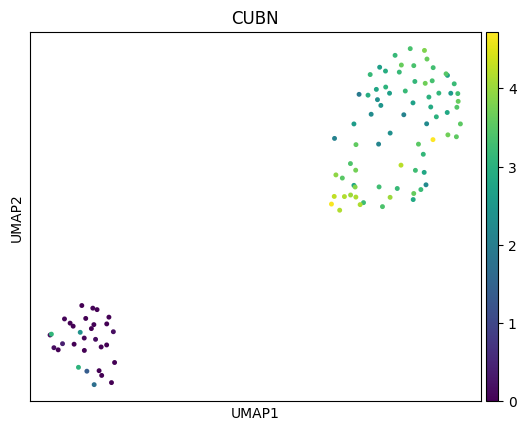

In [67]:
# Creating UMAPs and heatmaps (x-axis: clusters from the data, y-axis: known genes from Shifaan). 
# The umaps

known_genes = unique_genes  
known_genes =[ gene.upper() for gene in known_genes]

# Dictionary to hold valid genes for each dataset
valid_genes_dict = {}

# Check for valid genes in each dataset
for adata, name in zip(datasets, dataset_names):
    
    valid_genes = [gene for gene in known_genes if gene in adata.var_names]
    valid_genes_dict[name] = valid_genes

    # Print valid genes for debugging
    print(f"Valid genes in {name}: {valid_genes}")

    # Create a subset of the AnnData object with valid genes
    if valid_genes:  # Only create a heatmap if there are valid genes
        adata_subset = adata[:, valid_genes].copy()
            # Create the heatmap
        sc.pl.heatmap(
                adata_subset,
                var_names=valid_genes,  # Genes of interest on the y-axis
                groupby="seurat_clusters",  # Change this to the appropriate key for clusters
                cmap="viridis",  # Choose a color map
                swap_axes=True,  # Puts genes on y-axis, clusters on x-axis
                show_gene_labels=True,
                #dendogram=True,
                #save=f"heatmap_{name.replace(' ', '_')}.png"  # Save the figure with a unique name
            )
    else:
        print(f"No valid genes found in {name}. Heatmap not created.")

# Map datasets to their corresponding top genes
datasets = {
    "Dataset 1 (Time 3)": adata_3_1,
    "Dataset Wolf (Time 3)": adata_3_2,
    "Dataset 1 (Time 4)": adata_4_1,
    "Dataset Wolf (Time 4)": adata_4_2
}

topgenes_dict = {
    "Dataset 1 (Time 3)": topgenes_d1_3,
    "Dataset Wolf (Time 3)": [gene.upper() for gene in topgenes_d2_3],  # Capitalize genes
    "Dataset 1 (Time 4)": topgenes_d1_4,
    "Dataset Wolf (Time 4)": [gene.upper() for gene in topgenes_d2_4]   # Capitalize genes
}
output_dir = '../PhD/PhD/List_of_genes_final/top_ten_genes/umaps'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

GENE_list = ['Atxn2l', 'Ccnd3', 'Calm2', 'Cdk1']
gene_list_ = [gene.upper() for gene in GENE_list]  # Capitalize gene names

# Check if the genes are in the dataset
for gene in gene_list_:
    if gene in adata_3_2.var_names:
        print(f'Creating UMAP for {gene} in Dataset Wolf (Time 3):')
        sc.pl.umap(adata_3_2, color=gene, size=50)  # Increased size for markers
        plt.show()  # Show the plot
    else:
        print(f'Gene {gene} not found in Dataset Wolf (Time 3).')

# Create UMAPs for each gene in the top genes lists
for dataset_name, adata in datasets.items():
    print("dataset_name:",dataset_name )
    print('--------')
    print('adata:', adata)
    topgenes = topgenes_dict.get(dataset_name, [])

    
    print(f'Creating UMAPs for {dataset_name} with {len(topgenes)} top genes.')
    
    for gene in topgenes:
        if gene in adata.var_names:
            print(f'Creating UMAP for {gene} in {dataset_name}:')
            sc.pl.umap(adata, color=gene, size=50)  # Increased size for markers
            plt.show()  # Show the plot
        else:
            print(f'Gene {gene} not found in {dataset_name}.')

          

    


In [60]:
##### JUST AS SAFETY IN CASE YOU MESS UP YOUR CODE AGAIN ###

# Creating UMAPs and heatmaps (x-axis: clusters from the data, y-axis: known genes from Shifaan). 
# The umaps

known_genes = unique_genes  
known_genes =[ gene.upper() for gene in known_genes]

# Dictionary to hold valid genes for each dataset
valid_genes_dict = {}

# Check for valid genes in each dataset
for adata, name in zip(datasets, dataset_names):
    
    valid_genes = [gene for gene in known_genes if gene in adata.var_names]
    valid_genes_dict[name] = valid_genes

    # Print valid genes for debugging
    print(f"Valid genes in {name}: {valid_genes}")

    # Create a subset of the AnnData object with valid genes
    if valid_genes:  # Only create a heatmap if there are valid genes
        adata_subset = adata[:, valid_genes].copy()
            # Create the heatmap
        sc.pl.heatmap(
                adata_subset,
                var_names=valid_genes,  # Genes of interest on the y-axis
                groupby="seurat_clusters",  # Change this to the appropriate key for clusters
                cmap="viridis",  # Choose a color map
                swap_axes=True,  # Puts genes on y-axis, clusters on x-axis
                show_gene_labels=True,
                #dendogram=True,
                #save=f"heatmap_{name.replace(' ', '_')}.png"  # Save the figure with a unique name
            )
    else:
        print(f"No valid genes found in {name}. Heatmap not created.")

# Map datasets to their corresponding top genes
datasets = {
    "Dataset 1 (Time 3)": adata_3_1,
    "Dataset Wolf (Time 3)": adata_3_2,
    "Dataset 1 (Time 4)": adata_4_1,
    "Dataset Wolf (Time 4)": adata_4_2
}

topgenes_dict = {
    "Dataset 1 (Time 3)": topgenes_d1_3,
    "Dataset Wolf (Time 3)": [gene.upper() for gene in topgenes_d2_3],  # Capitalize genes
    "Dataset 1 (Time 4)": topgenes_d1_4,
    "Dataset Wolf (Time 4)": [gene.upper() for gene in topgenes_d2_4]   # Capitalize genes
}
output_dir = '../PhD/PhD/List_of_genes_final/top_ten_genes/umaps'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist


# Create UMAPs for each gene in the top genes lists
for dataset_name, adata in datasets.items():
    print("dataset_name:",dataset_name )
    print('--------')
    print('adata:', adata)
    topgenes = topgenes_dict.get(dataset_name, [])

    
    print(f'Creating UMAPs for {dataset_name} with {len(topgenes)} top genes.')
    
    for gene in topgenes:
        if gene in adata.var_names:
            print(f'Creating UMAP for {gene} in {dataset_name}:')
            sc.pl.umap(adata, color=gene, size=50)  # Increased size for markers
            plt.show()  # Show the plot
        else:
            print(f'Gene {gene} not found in {dataset_name}.')

          

    


AttributeError: 'str' object has no attribute 'var_names'

In [31]:
#what is this?? check 


### load the data with the top ten genes of the list of genes considering: ###
### marker genes, spapros genes, ciara genes and genes that correlate with lefty1 ###
### these are the top ten based on how many time these genes are suggested by either the 4 methods above:
## the lists are from datasetX_tpY_genes_.csv X = 1,2 ; Y = 3.5, 4.5

top_d1_t3 = pd.read_csv('../PhD/PhD/List_of_genes_final/top_ten_genes/dataset1_tp3_top10.csv')
top_d1_t4 = pd.read_csv('../PhD/PhD/List_of_genes_final/top_ten_genes/dataset1_tp4_top10.csv')
top_d2_t3 = pd.read_csv('../PhD/PhD/List_of_genes_final/top_ten_genes/dataset2_tp3_top10.csv')
top_d2_t4 = pd.read_csv('../PhD/PhD/List_of_genes_final/top_ten_genes/dataset2_tp4_top10.csv')

In [32]:
#what is this?? check 

topgenes_d1_3 = top_d1_t3['Gene'].values.tolist()
topgenes_d1_4 = top_d1_t4['Gene'].values.tolist()
topgenes_d2_3 = top_d2_t3['Gene'].values.tolist()
topgenes_d2_4 = top_d2_t4['Gene'].values.tolist()

In [33]:
#what is this?? check 


filepath_3_1 = '../PhD/PhD/Shankar_genes/SPAPROS_11.24/time_3/endo_time_3_dataset_1.h5ad'
filepath_3_2 = '../PhD/PhD/Shankar_genes/SPAPROS_11.24/time_3/endo_time_3_dataset_wolf.h5ad'
filepath_4_1 = '../PhD/PhD/Shankar_genes/SPAPROS_11.24/time_4/endo_time_4_dataset_1.h5ad'
filepath_4_2 = '../PhD/PhD/Shankar_genes/SPAPROS_11.24/time_4/endo_time_4_dataset_wolf.h5ad'

adata_3_1 = sc.read_h5ad(filepath_3_1)
adata_3_2 = sc.read_h5ad(filepath_3_2)
adata_4_1 = sc.read_h5ad(filepath_4_1)
adata_4_2 = sc.read_h5ad(filepath_4_2)

adata_3_2.var_names = [gene.upper() for gene in adata_3_2.var_names]
adata_4_2.var_names = [gene.upper() for gene in adata_4_2.var_names]



In [48]:
#what is this?? check 
#what is this?? check 




# Function to create UMAP for each gene
def umap_for_each_gene(adata, gene, timepoint, dataset_name):
    print(f'Creating UMAP for {gene} in {dataset_name} at {timepoint}:')
    sc.pl.umap(adata, color=gene, size=20)  # Adjust size for smaller markers
    plt.show()  # Explicitly show the plot

# List of top genes for each dataset

top_d1_t3 = pd.read_csv('../PhD/PhD/List_of_genes_final/top_ten_genes/dataset1_tp3_top10.csv')
top_d1_t4 = pd.read_csv('../PhD/PhD/List_of_genes_final/top_ten_genes/dataset1_tp4_top10.csv')
top_d2_t3 = pd.read_csv('../PhD/PhD/List_of_genes_final/top_ten_genes/dataset2_tp3_top10.csv')
top_d2_t4 = pd.read_csv('../PhD/PhD/List_of_genes_final/top_ten_genes/dataset2_tp4_top10.csv')

topgenes_d1_3 = top_d1_t3['Gene'].values.tolist()
topgenes_d1_4 = top_d1_t4['Gene'].values.tolist()
topgenes_d2_3 = top_d2_t3['Gene'].values.tolist()
topgenes_d2_4 = top_d2_t4['Gene'].values.tolist()

topgenes_dict = {
    "Dataset 1 (Time 3)": topgenes_d1_3,
    "Dataset 1 (Time 4)": topgenes_d1_4,
    "Dataset 2 (Time 3)": topgenes_d2_3,
    "Dataset 2 (Time 4)": topgenes_d2_4
}

# Create UMAPs for each gene in the top genes lists
for key, selection_df in spapros_results.items():
    timepoint, dataset_name = key.split('_', 1)
    topgenes = topgenes_dict.get(dataset_name, [])
    
    for gene in topgenes:
        umap_for_each_gene(adatas[key], gene, timepoint, dataset_name)

In [55]:
#what is this?? check 


print("Executing UMAP plotting cell...")

top_d1_t3 = pd.read_csv('../PhD/PhD/List_of_genes_final/top_ten_genes/dataset1_tp3_top10.csv')
top_d1_t4 = pd.read_csv('../PhD/PhD/List_of_genes_final/top_ten_genes/dataset1_tp4_top10.csv')
top_d2_t3 = pd.read_csv('../PhD/PhD/List_of_genes_final/top_ten_genes/dataset2_tp3_top10.csv')
top_d2_t4 = pd.read_csv('../PhD/PhD/List_of_genes_final/top_ten_genes/dataset2_tp4_top10.csv')

topgenes_d1_3 = top_d1_t3['Gene'].values.tolist()
topgenes_d1_4 = top_d1_t4['Gene'].values.tolist()
topgenes_d2_3 = top_d2_t3['Gene'].values.tolist()
topgenes_d2_4 = top_d2_t4['Gene'].values.tolist()


# List of top genes for each dataset
topgenes_dict = {
    "Dataset 1 (Time 3)": topgenes_d1_3,
    "Dataset 1 (Time 4)": topgenes_d1_4,
    "Dataset 2 (Time 3)": topgenes_d2_3,
    "Dataset 2 (Time 4)": topgenes_d2_4
}

    # Create UMAPs for each gene in the top genes lists
topgenes = topgenes_dict.get(dataset_name, [])

for gene in topgenes:
    if gene in adata.var_names:
        print(f'Creating UMAP for {gene} in {dataset_name} at {timepoint}:')
        sc.pl.umap(adata, color=gene, size=20)  # Adjust size for smaller markers
        plt.show()  # Show the plot
    else:
        print(f'Gene {gene} not found in adata.var_names.')

Executing UMAP plotting cell...



Figures for 4_dataset_1 time:


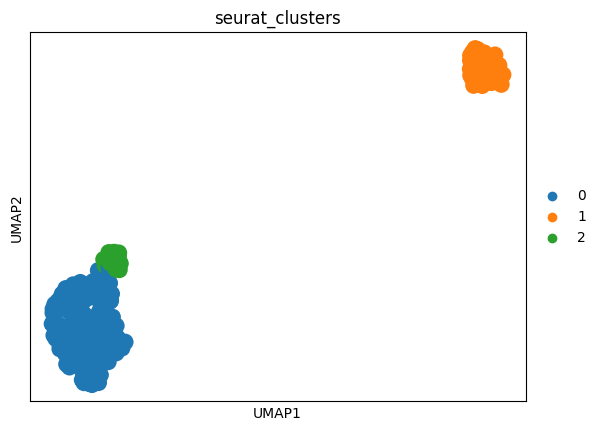

Current dataset name: 4_dataset_1
Top genes dictionary: {'Dataset 1 (Time 3)': ['AKR1C13', 'AQP8', 'BHMT', 'BMP4', 'COL4A2', 'CTSL', 'DUSP9', 'ENO4', 'EPHA2', 'FAM25C'], 'Dataset 1 (Time 4)': ['APOA1', 'DGKK', 'FGF8', 'HMGB3', 'LHX1', 'PGA5', 'ACP6', 'ADPRH', 'AIRE', 'ALDH2'], 'Dataset 2 (Time 3)': ['Bhmt', 'Gm20431', 'Hsp90aa1', 'Odc1', 'Pramel33', 'Rps15a', '1110018N20Rik', '1700003M07Rik', '1700095A21Rik', '1700110K17Rik'], 'Dataset 2 (Time 4)': ['Slc7a3', '1190005I06Rik', 'Amot', 'Angptl4', 'Anp32a', 'Arhgap4', 'Ckap4', 'Creld2', 'Ctsh', 'Cubn']}
No top genes found for 4_dataset_1.


/Users/kimjob/opt/anaconda3/envs/py39/lib/python3.9/site-packages/spapros/plotting/_masked_dotplot.py:546: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  dot_ax.scatter(x, y, **kwds)


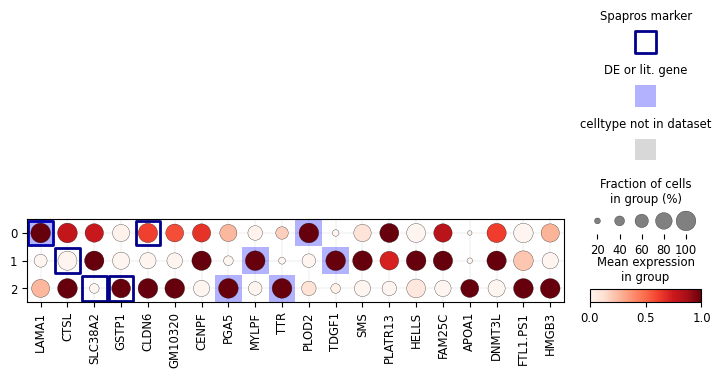

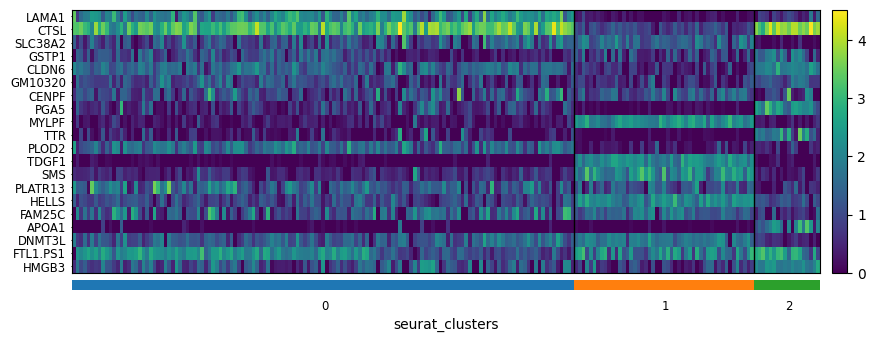


Figures for 4_dataset_wolf time:


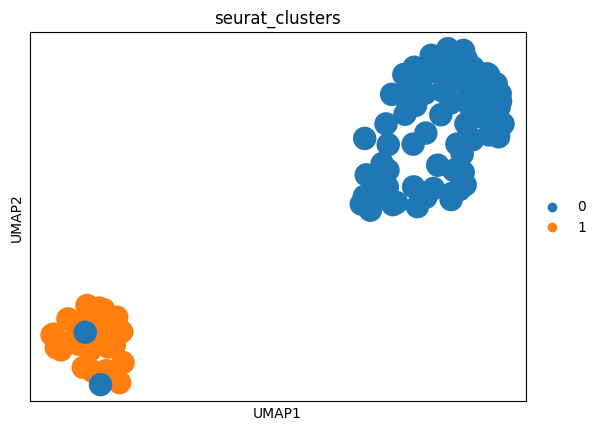

Current dataset name: 4_dataset_wolf
Top genes dictionary: {'Dataset 1 (Time 3)': ['AKR1C13', 'AQP8', 'BHMT', 'BMP4', 'COL4A2', 'CTSL', 'DUSP9', 'ENO4', 'EPHA2', 'FAM25C'], 'Dataset 1 (Time 4)': ['APOA1', 'DGKK', 'FGF8', 'HMGB3', 'LHX1', 'PGA5', 'ACP6', 'ADPRH', 'AIRE', 'ALDH2'], 'Dataset 2 (Time 3)': ['Bhmt', 'Gm20431', 'Hsp90aa1', 'Odc1', 'Pramel33', 'Rps15a', '1110018N20Rik', '1700003M07Rik', '1700095A21Rik', '1700110K17Rik'], 'Dataset 2 (Time 4)': ['Slc7a3', '1190005I06Rik', 'Amot', 'Angptl4', 'Anp32a', 'Arhgap4', 'Ckap4', 'Creld2', 'Ctsh', 'Cubn']}
No top genes found for 4_dataset_wolf.


/Users/kimjob/opt/anaconda3/envs/py39/lib/python3.9/site-packages/spapros/plotting/_masked_dotplot.py:546: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  dot_ax.scatter(x, y, **kwds)


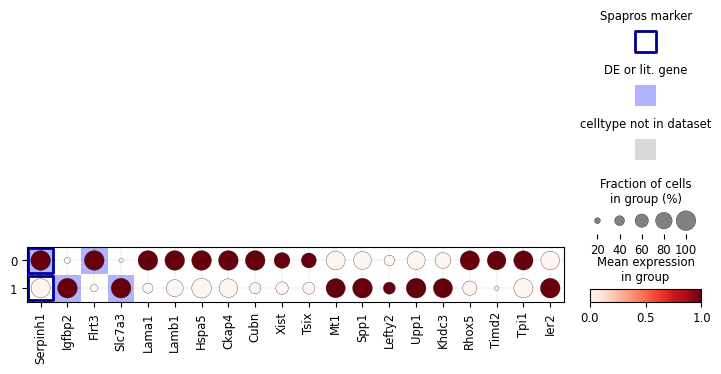

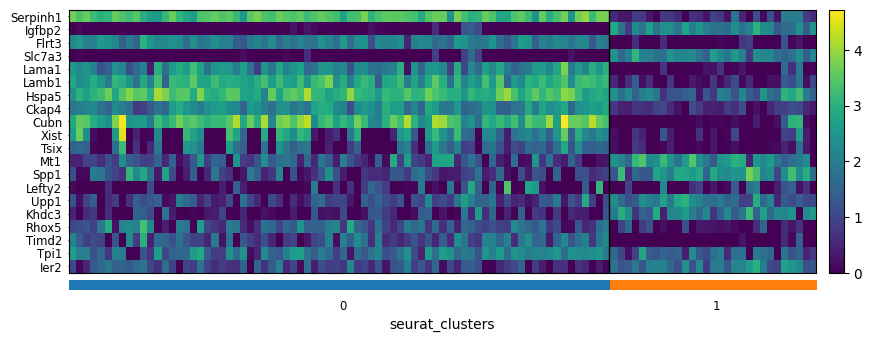


Figures for 3_dataset_1 time:


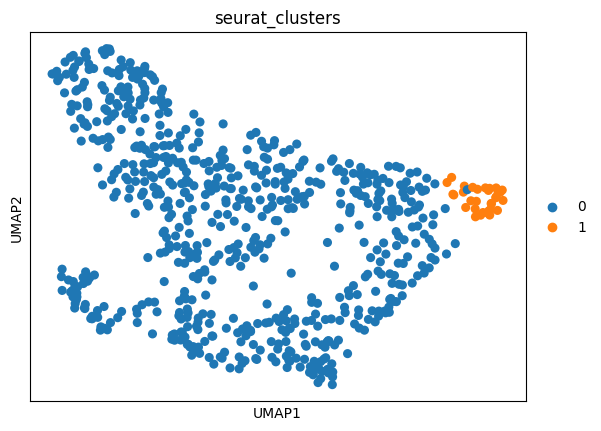

Current dataset name: 3_dataset_1
Top genes dictionary: {'Dataset 1 (Time 3)': ['AKR1C13', 'AQP8', 'BHMT', 'BMP4', 'COL4A2', 'CTSL', 'DUSP9', 'ENO4', 'EPHA2', 'FAM25C'], 'Dataset 1 (Time 4)': ['APOA1', 'DGKK', 'FGF8', 'HMGB3', 'LHX1', 'PGA5', 'ACP6', 'ADPRH', 'AIRE', 'ALDH2'], 'Dataset 2 (Time 3)': ['Bhmt', 'Gm20431', 'Hsp90aa1', 'Odc1', 'Pramel33', 'Rps15a', '1110018N20Rik', '1700003M07Rik', '1700095A21Rik', '1700110K17Rik'], 'Dataset 2 (Time 4)': ['Slc7a3', '1190005I06Rik', 'Amot', 'Angptl4', 'Anp32a', 'Arhgap4', 'Ckap4', 'Creld2', 'Ctsh', 'Cubn']}
No top genes found for 3_dataset_1.


/Users/kimjob/opt/anaconda3/envs/py39/lib/python3.9/site-packages/spapros/plotting/_masked_dotplot.py:546: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  dot_ax.scatter(x, y, **kwds)


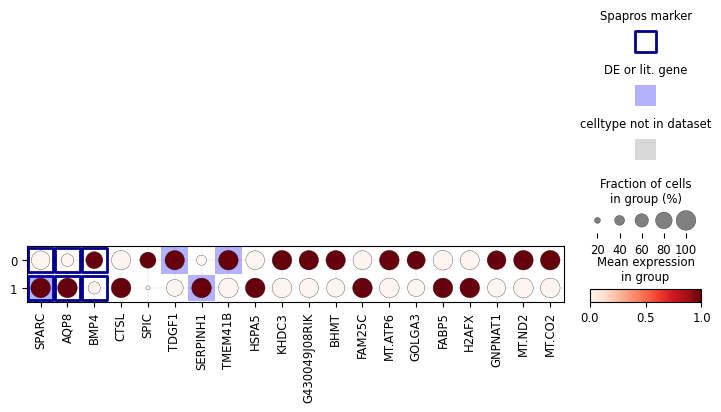

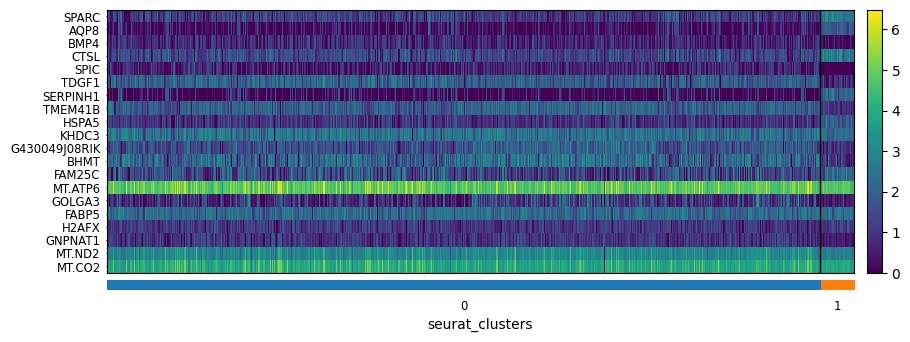


Figures for 3_dataset_wolf time:


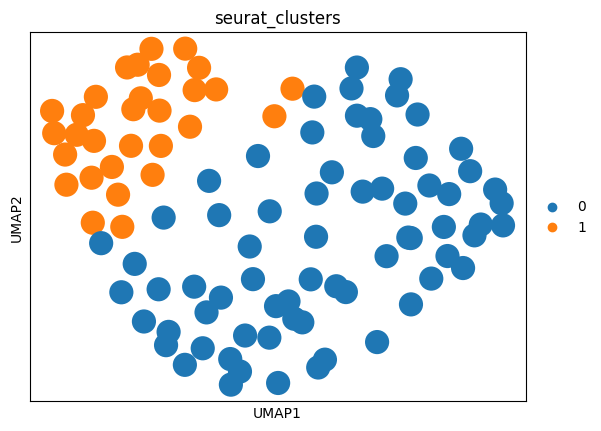

Current dataset name: 3_dataset_wolf
Top genes dictionary: {'Dataset 1 (Time 3)': ['AKR1C13', 'AQP8', 'BHMT', 'BMP4', 'COL4A2', 'CTSL', 'DUSP9', 'ENO4', 'EPHA2', 'FAM25C'], 'Dataset 1 (Time 4)': ['APOA1', 'DGKK', 'FGF8', 'HMGB3', 'LHX1', 'PGA5', 'ACP6', 'ADPRH', 'AIRE', 'ALDH2'], 'Dataset 2 (Time 3)': ['Bhmt', 'Gm20431', 'Hsp90aa1', 'Odc1', 'Pramel33', 'Rps15a', '1110018N20Rik', '1700003M07Rik', '1700095A21Rik', '1700110K17Rik'], 'Dataset 2 (Time 4)': ['Slc7a3', '1190005I06Rik', 'Amot', 'Angptl4', 'Anp32a', 'Arhgap4', 'Ckap4', 'Creld2', 'Ctsh', 'Cubn']}
No top genes found for 3_dataset_wolf.


/Users/kimjob/opt/anaconda3/envs/py39/lib/python3.9/site-packages/spapros/plotting/_masked_dotplot.py:546: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  dot_ax.scatter(x, y, **kwds)


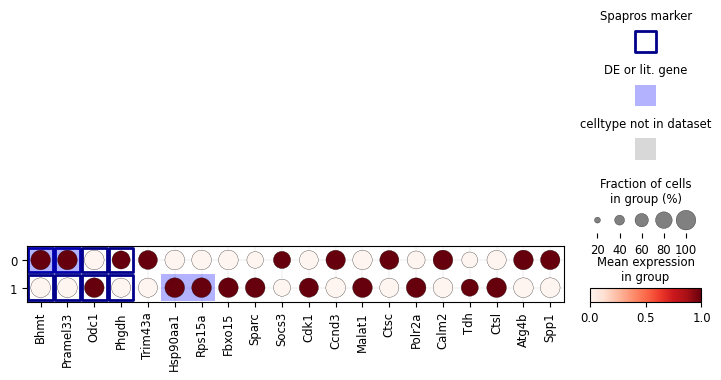

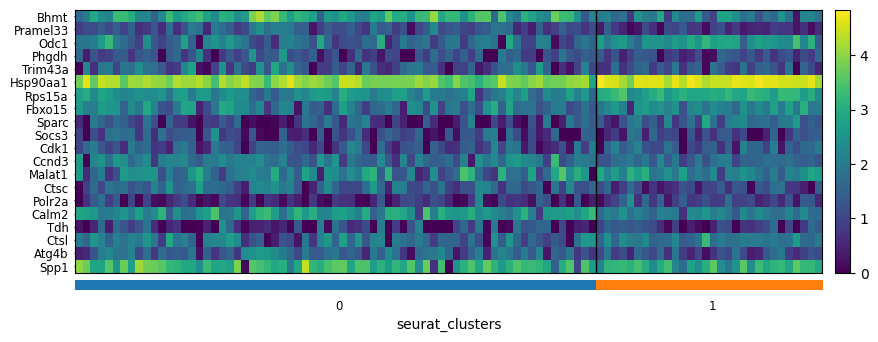

In [59]:
#what is this?? check 


# Visualization function
def visualize_results(adata, selection_df, selector, timepoint, dataset_name):
    print(f'\nFigures for {dataset_name} {timepoint}:')
    
    # UMAP plot for clusters
    sc.pl.umap(adata, color="seurat_clusters")

 
    
    # Dotplot
    sp.pl.masked_dotplot(
        adata, 
        selector, 
        ct_key="seurat_clusters", 
        celltypes=adata.obs["seurat_clusters"].unique()
    )

# heatmap using spapros genes

    goi = selection_df["Gene"].to_list()  # Get the genes of interest
    adata_subset = adata[:, goi].copy()

    #sc.tl.dendrogram(adata_subset, groupby='seurat_clusters')
    
    sc.pl.heatmap(
    adata_subset,
    var_names=goi,
    groupby="seurat_clusters",
    cmap="viridis",  # or any color map you prefer
    swap_axes=True,  # Puts genes on y-axis, clusters on x-axis
    
)
    
#heatmapt using known genes from Shifaan

    

# Visualize results for each dataset
for key, (selection_df, selector) in spapros_results.items():
    timepoint, dataset_name = key.split('_', 1)
    visualize_results(
        adatas[key], 
        selection_df, 
        selector, 
        timepoint, 
        dataset_name
    )


Figures for 4_dataset_1 time:


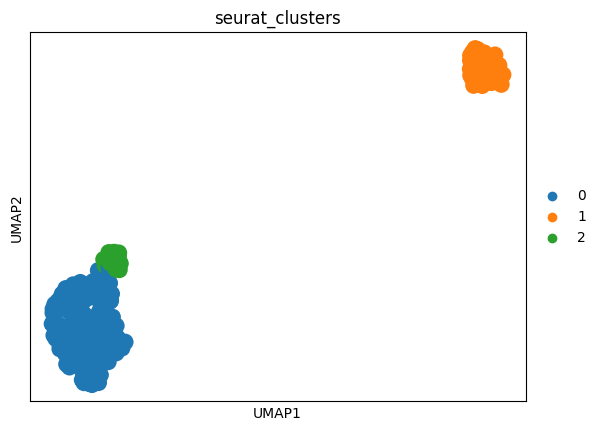

/Users/kimjob/opt/anaconda3/envs/py39/lib/python3.9/site-packages/spapros/plotting/_masked_dotplot.py:546: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  dot_ax.scatter(x, y, **kwds)


AnnData object with n_obs × n_vars = 204 × 20
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'integrated_snn_res.0.1', 'seurat_clusters'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'seurat_clusters_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'


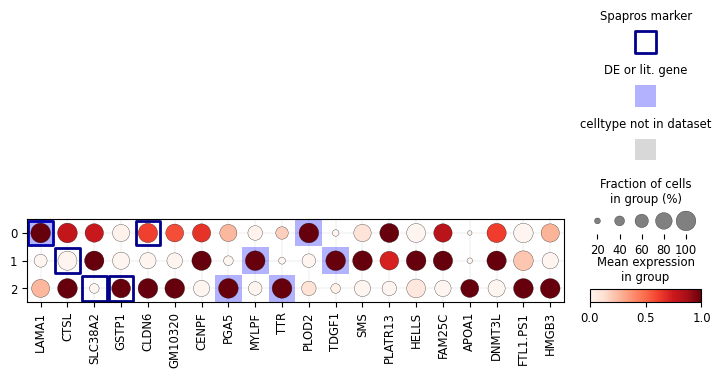

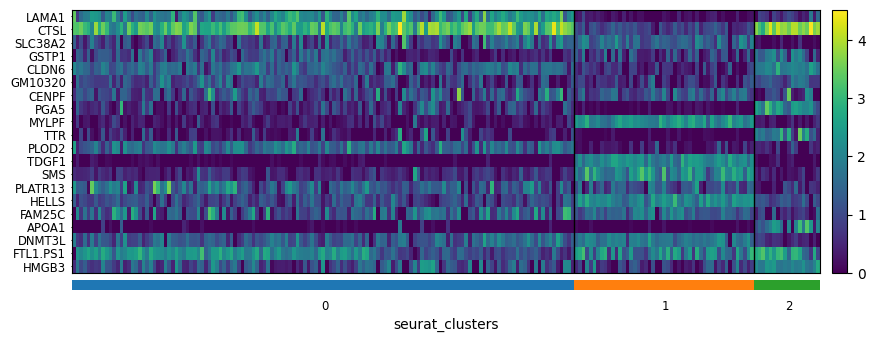

In [139]:
def visualize_results(adata, selection_df, selector, timepoint, dataset_name):
    print(f'\nFigures for {dataset_name} {timepoint}:')
    
    # UMAP plot
    sc.pl.umap(adata, color="seurat_clusters")
    
    # Dotplot
    sp.pl.masked_dotplot(
        adata, 
        selector, 
        ct_key="seurat_clusters", 
        celltypes=adata.obs["seurat_clusters"].unique()
    )
    
    goi = selection_df["Gene"].to_list()
    adata_subset = adata[:, goi].copy()

    print(adata_subset)
    
    sc.pl.heatmap(
        adata_subset,
        var_names=goi,
        groupby="seurat_clusters",
        cmap="viridis",
        #dendrogram=True,
        swap_axes=True,
    )
# Visualize results for each dataset
for key, (selection_df, selector) in spapros_results.items():
    timepoint, dataset_name = key.split('_', 1)
    visualize_results(
        adatas[key], 
        selection_df, 
        selector, 
        timepoint, 
        dataset_name   
    )

In [54]:
known_genes = known_genes.values.tolist()

In [68]:
known_genes

[[None,
  'Cdx2',
  'Sox2',
  'Cdx2',
  'Hand1',
  'Oct4',
  'PdgfrA',
  'Gata6',
  'FoxA2',
  'Cdx2',
  'Sfrp5',
  'Aplp1',
  'Cer1'],
 [None,
  'Gata3',
  'Nanog',
  'Ovol1',
  'Ascl2',
  'Nanog',
  'Sox17',
  'Sox17',
  'Ttr',
  'Hand1',
  'Gpc4',
  'Egr1',
  'Lefty1'],
 [None,
  'Gata2',
  'Oct4',
  'Gata3',
  'Plac1',
  'Fgf4',
  'Gata4',
  'Lama1',
  'Lhx1',
  'Gata3',
  'Afp',
  'Fabp3',
  'Hhex'],
 [None,
  'Eomes',
  'Sall4',
  'Eomes',
  'Phlda2',
  'Tdgf1',
  'Fgfr2',
  'Sall4',
  'Afp',
  'Elf5',
  'Foxq1',
  'Apln',
  'Efna5'],
 [None,
  'Tfap2c',
  'Klf4',
  'Muc15',
  'Prl3d1',
  'Slc7a3',
  'Gata6',
  'Myc',
  'Cited1',
  'Cldn4',
  'Lhx1',
  'Apa2',
  'Krt19'],
 [None,
  'Elf5',
  'Stat3',
  'Dlx5',
  None,
  'Sox11',
  'Sox7',
  'Lamb1',
  'Hnf1b',
  'S100a6',
  'Fgf5',
  'Msx1',
  'Gsc'],
 [None,
  'Id2',
  None,
  'Ccr7',
  None,
  'Esrrb',
  'Grb2',
  'Sparc',
  'Dab2',
  None,
  'Shisa2',
  'S100a13',
  'Ak31c13'],
 [None,
  'Tead4',
  None,
  'Fgfr2',
  None,
  '